MovieWriter ffmpeg unavailable; using Pillow instead.


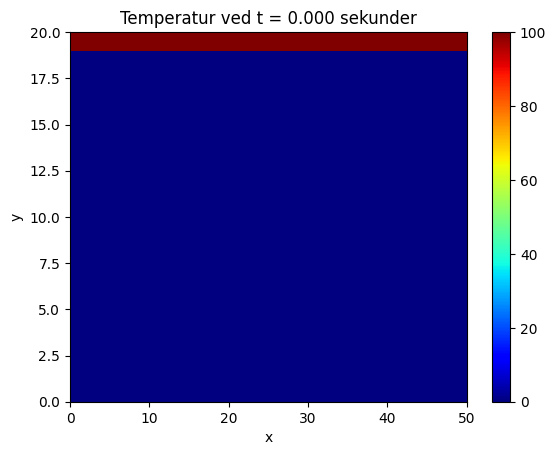

In [17]:
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
import random as ra

#Varmeligningen vil løses for en plate over en viss tidsperiode
#En side av platen vil starte med en gitt temperatur, mens resten starter ved 0C

#Ligningen vil løses ved hjelp av Euler eksplisitt
#Ved å bruke k, i og j som indekser for tid, y-retning og x-retning kan ligningen skrives om til:
#u[k+1,j,i] = gamma*(u[k,i+1,j] + u[k,i-1,j] + u[k,i,j+1] + u[k,i,j-1] - 4u[k,i,j]) + u[k,i,j]
#Hvor gamma er en sammentrekning av variabler


y_lengde = 20 #Platens sidelengder
x_lengde = 50
max_tid = 700 #Hvor lenge vi regner

alpha = 3 #Den termiske diffusiviteten til materialet, måles i mm^2/s
delta_x = 1 #Steglengden i x-retning
delta_y = 1 #Steglengden i y-retning

#Ved å Taylor-utvikle osv kan det vises at løsningen er stabil så lenge delta_t <= (delta_x/4*alpha)
delta_t = (delta_x**delta_y)/(4*alpha)
gamma = (alpha*delta_t)/(delta_x*delta_y) #Variabler samles i felles variabel

#Definerer starttemperaturen over plata
u_start = 0.0
u_top = 100.0

#Fikser et grid med punkter som utvikler seg over tid og fyller for første tidssteg
u = np.empty((max_tid, y_lengde, x_lengde))
u.fill(u_start)
u[:, (y_lengde-1):, :] = u_top

#Finner temperaturen i alle punkter for neste tidssteg
def kalkuler_plata(u):
    for k in range(0, max_tid-1, 1):
        for i in range(1, y_lengde-1, delta_x):
            for j in range(1, x_lengde-1, delta_x):
                u[k+1,i,j] = gamma*(u[k,i+1,j] + u[k,i-1,j] + u[k,i,j+1] + u[k,i,j-1] -4*u[k,i,j]) + u[k,i,j]

    return u

#Plotter temperaturen over platen for ett gitt tidspunkt k
def plot_plate(u_k, k):
    #Tømmer plottet for å unngå kluss
    plt.clf()

    plt.title(f"Temperatur ved t = {k*delta_t:.3f} sekunder")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

#Regner faktisk ut platens temperatur over tid her
u = kalkuler_plata(u)

#Hjelpefunksjon for senere
def animer(k):
    plot_plate(u[k], k)

#Lager fin animasjon, fordi hvorfor ikke?
anim = animation.FuncAnimation(plt.figure(), animer, interval=1, frames=max_tid, repeat=False)
anim.save("varmeligning_loest_paa_plate.gif")
